# Workshop 1 - Deep Learning Baics

Welcome to your first workshop! This notebook contains skeleton code and useful comments to help you work through the exercise.

Feel free to add in your own markdown for additional comments, and also directly comment your code.

# BEFORE YOU START
* Click on Runtime -> Change runtime type -> Make sure hardware accelerator is set to GPU

In [8]:
## Libraries, you do not need to import any additional libraries for this workshop

import numpy as np ## Numpy is the fundamental building block of understanding tensors (matrices) within Python
import matplotlib.pyplot as plt ## Matplotlib.pyplot is the graphing library that we will be using
import random ## Useful for sampling
import sys ## Useful to retrieve some system information

import math # Basic math library

import os ## Useful for running command line within python
from IPython.display import Image ## For markdown purposes

# Logistic Regression - A Quick Introduction

The name **Logistic Regression** is slightly misleading: Instead of regression, we are solving **binary classification** problems with this appraoch!

More specifically, we model the probabilities of the outcomes of our classification problem, and we can thus understand logistic regression like an extension of linear regression to solve classification (_i.e._, for categorical data).

A visual comparison of Linear Regression vs. Logistic regression and especially their 'output' predictions $Y$ for different input points $X$ in a simple 1D case is depicted in the following image:

In [9]:
Image(url='https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg', width=800)

# Section 1 - The Sigmoid function and making predictions

In this section, you will be writing the first parts of your code that is essential to predict the outcome of a logistic regression problem. </br>

In detail, you are going to
- 1.1 Implement and visualise the **sigmoid function**
- 1.2 Write code to **predict the outcome** of a classification problem using a pre-trained logistic regression model

## 1.1  The sigmoid function

The '_sigmoid function_' $\sigma$, is a mathematical function that shows a characteristic "S"-shaped curve as you've seen in the slides. We commonly use this function in our logistic regression to map the regression outputs to a range from 0 to 1. </br>

### Computing the sigmoid
In this task, you are now first asked to write a function that computes the output of the sigmoid function $\sigma(\boldsymbol{x})$ for any input value $\boldsymbol{x}$. </br>

$$ \sigma(x) = {1 \over 1 + e^{-x}} $$

In [10]:
# Implement the sigmoid function
def sigmoid(x):
    x = np.clip(x, -500, 500) # this line is used to prevent overflow error as a result of x being too small
    return 1.0 / (1.0 + np.exp(-x))

To test the correctness of your implementation, call your sigmoid function with the following input values:
- $x_1 = 3.$
- $\boldsymbol{x}_2 = [2., 9.]$
- $\boldsymbol{x}_3 = [ [3., -6.], [4., -8.] ]$


In [11]:
## Define the inputs x1, x2 and x3
x_1 = 3
x_2 = np.array([2,9])
x_3 = np.array([[3,-6],[4,-8]])

# Use your implemented sigmoid function to obtain the results for the given x_i
z_1 = sigmoid(x_1)
z_2 = sigmoid(x_2)
z_3 = sigmoid(x_3)

In [12]:
## Now let's print the obtained results
print(f'z_1: {z_1}')
print(f'z_2: {z_2}')
print(f'z_3: {z_3}')

z_1: 0.9525741268224334
z_2: [0.88079708 0.99987661]
z_3: [[9.52574127e-01 2.47262316e-03]
 [9.82013790e-01 3.35350130e-04]]


If your implementation is correct, you should obtain a printed output similar to this: </br>
- z_1: &nbsp;&nbsp;0.9525741268224334 </br>
- z_2: [0.88079708 0.99987661] </br>
- z_3: [[9.52574127e-01 2.47262316e-03]</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[9.82013790e-01 3.35350130e-04]]</br>

### Visualising your Sigmoid

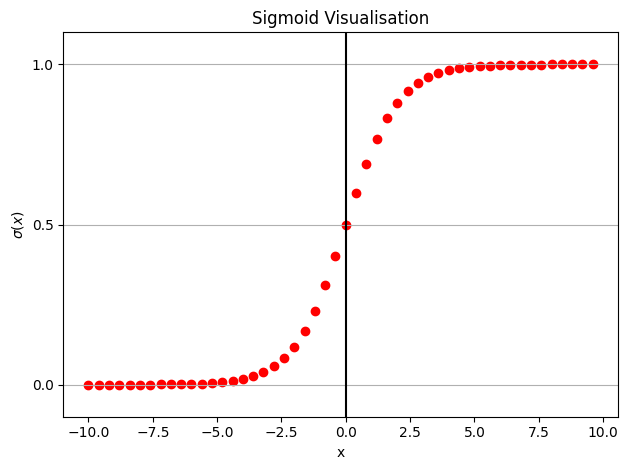

In [13]:
## Visualise the output of the sigmoid function in a range from -10 to 10
x = np.arange(-10, 10, 0.4) # 50 data points only
sigma_x = sigmoid(x)

# plotting the Sigmoid function with red scatter plot
plt.scatter(x,sigma_x,c='r')
plt.axvline(0.0, color='k') # zero-crossing
plt.ylim(-0.1, 1.1) # outputs of sigmoid do not exceed (0,1)
plt.xlabel('x')
plt.ylabel('$\sigma (x)$')
plt.title('Sigmoid Visualisation')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

#### Q. What would happen if you only used a small number of datapoints to plot?

In [14]:
## Answer here
    # If smaller number of data points were used for these plots the characteristics of the sigmoid function would begin to
    # be lost (e.g at few data points it behaves like a piecewise function). The plots appear discontinuous and do not accurately
    # visualise the Sigmoid function. This is particularly the case for the scatter plot.

## 1.2 Making predictions
You will now use your implemented sigmoid function to solve an actual classification problem using logistic regression. </br>

A prediction $\hat{y}$ can be obtained by using our logistic regression model via $\hat{y}=\sigma(\boldsymbol{w}^\top \boldsymbol{x})$

Why? From the image below convince yourself this is the case :)

In [15]:
Image(url='https://miro.medium.com/v2/resize:fit:1170/1*-hdeb1xx3Fl4-L74hO41OQ.png', width=800)

In [16]:
# Read in data.npz using numpy --> data has been saved via np.savez

# Components can be accessed like a dictionary after the file has been loaded, and the file contains the following:
# 'X_train' : training data we're going to use
# 'y_train' : labels for the training data
# 'X_test'  : test data we're going to use for evaluation, but NOT for training
# 'y_test'  : labels for the test data
# 'w_pret'  : a set of random weights for the logistic regression model

loaded_data = np.load('data.npz')
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']
X_test = loaded_data['X_test']
y_test = loaded_data['y_test']
w_pret = loaded_data['w_pret']

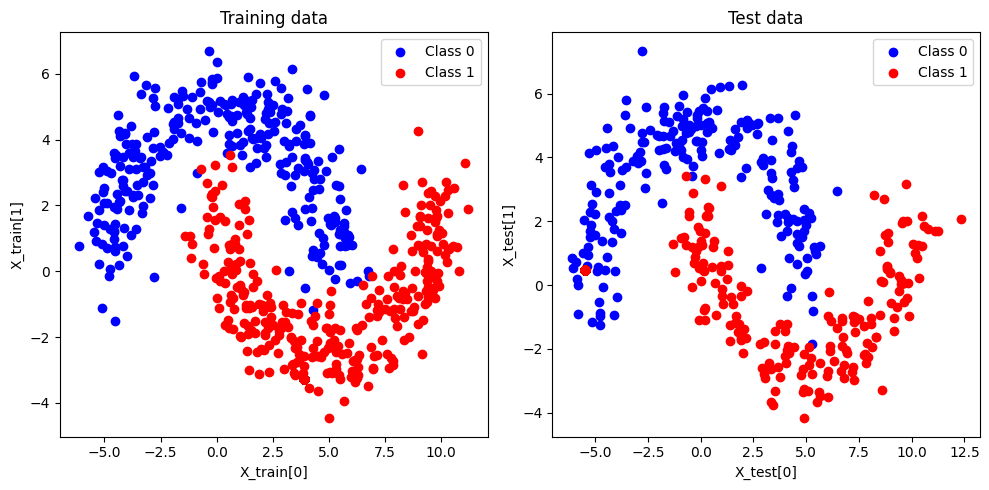

In [17]:
# Add side by side plots here to visualise your train and test data.
# This is the two classes you will be classifying.
train_class_0 = np.where(y_train == 0)
train_class_1 = np.where(y_train == 1)
test_class_0 = np.where(y_test == 0)
test_class_1 = np.where(y_test == 1)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X_train[train_class_0,0], X_train[train_class_0,1], c='b', label="Class 0")
ax1.scatter(X_train[train_class_1,0], X_train[train_class_1,1], c='r', label="Class 1")
ax1.set_xlabel('X_train[0]')
ax1.set_ylabel('X_train[1]')
ax1.set_title('Training data')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_test[test_class_0,0], X_test[test_class_0,1], c='b', label="Class 0")
ax2.scatter(X_test[test_class_1,0], X_test[test_class_1,1], c='r', label="Class 1")
ax2.set_xlabel('X_test[0]')
ax2.set_ylabel('X_test[1]')
ax2.set_title('Test data')
ax2.legend()

plt.tight_layout()

In [18]:
## Check the shape of the data!
# Note that we assume certain shapes of data for the basic logistic regression formulas to work,
# so make sure you understand which elements should be multiplied with each other!
# Hint: In case the data is stored in a different shape, you can easily transpose the matrices!

print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
print(f'w_pret: {w_pret.shape}')

X_train: (600, 2)
y_train: (600, 1)
X_test: (400, 2)
y_test: (400, 1)
w_pret: (2, 1)


#### Q. Explain the shapes of the data. What do the numbers represent, and why do they differ?

In [19]:
## Answer here
    # The '600' and '400' for the test and train sets refer to how many datapoints in train and test data sets respectively
    # The train and test input datapoints are two dimensional, as noted by the '2' in the second item in the X_train and X_test tuples
    # The output label for each datapoint is one dimensional, as noted by the '1' in the second item of the y_train and y_test tuples
        # For prediction y = (w^T)X -> inner product gives scalar
    # The weights are a two dimensional column vector as noted by the (2,1) tuple for w_pret

    # The train and test datasets have a different number of datapoints, which is why their first dimensions are different.
    # The input datapoints are described by two features, and hence we require a 2-column matrix to represent each datapoint.
    # On the other hand, the output labels are simply a scalar used to classify an input as either belonging to class 0 or class 1, hence it only requires a vector to represent
    # The weights are a two-dimensional vector as we have two input features, and therefore require a parameter for each

### Predicting class probabilities via logistic regression
After having obtained the data and a set of weights for our logistic regression model, you are now going to:
- Implement a function to predict outcomes using a linear regression model (taking in data $\boldsymbol{X}$ and parameters $\boldsymbol{w}$)
- Test your function on the example data provided below
- Test your function on the read-in training data $\boldsymbol{X}_{train}$

Note that our data is stored as [number of samples, dim], so you need to pay attention to possibly required transpose operations to perform the calculations correctly. </br>

We also want the same to be true for our predictions, _i.e._ return them in the format [number of samples, 1] to match the input data.

In [20]:
# Write a prediction function -> We predict the output class probability, NOT the class label (no 0,1 rounding)
def predict(X, w):
    # Reshape X input to have data in the columns [mxn]-->[nxm]
    # for inner product input X has to be column vector
    if len(X.shape) == 2:
        X_t = np.transpose(X)
    else:
        X_t = np.transpose(X.reshape(1,-1)) # just making sure 1 row input is considered 2D

    # Perfrom Matrix multiplication
    w_t = np.transpose(w) # column vector weights have to be transposed to row vector for inner product
    Z = np.matmul(w_t,X_t)

    # Calling Sigmoid
    y_hat = sigmoid(Z)

    return y_hat.reshape(-1,1) # match input data format

Test your prediction function using the following toy data points / samples:
- $\boldsymbol{X}_1 = [[0.5, 0.1]]$
- $\boldsymbol{X}_2 = [ [-0.5, -0.7], [0.4, 0.2] ]$
- $\boldsymbol{X}_3 = [ [-0.3, -0.15], [0.89, -0.02], [-0.35, 0.01], [0.26, -0.64] ]$

In [21]:
## Define the toy input data
X_1 = np.array([[0.50,0.1]])
X_2 = np.array([[-0.5,-0.7],[0.4,0.2]])
X_3 = np.array([[-0.3,-0.15],[0.89,-0.02],[-0.35,0.01],[0.26,-0.64]])

## Obtain predictions using predict function and pretrained parameters w_pret
y_hat_1 = predict(X_1, w_pret)
y_hat_2 = predict(X_2, w_pret)
y_hat_3 = predict(X_3, w_pret)

print(f'y_hat_1: {y_hat_1}')
print(f'y_hat_2: {y_hat_2}')
print(f'y_hat_3: {y_hat_3}')

y_hat_1: [[0.51370692]]
y_hat_2: [[0.61837619]
 [0.48409849]]
y_hat_3: [[0.51192789]
 [0.56831845]
 [0.47251372]
 [0.65665833]]


**If your predict function works as intended, your results should be close to:** </br>
y_hat_1: &nbsp;[[0.51370692]]</br>
y_hat_2: [[0.61837619]</br>
&emsp;&emsp;&emsp;&emsp; &nbsp;&nbsp;[0.48409849]]</br>
y_hat_3: [[0.51192789]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.56831845]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.47251372]</br>
&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;  [0.65665833]]</br>

Now let's additionally test the predict function on the $\boldsymbol{X}_{train}$ data we read in from the stored file and compare the output shape to the shape of the provided labels $\boldsymbol{y}_{train}$.

In [22]:
## Test on the read-in X_train data:
y_hat_data = predict(X_train,w_pret)

# Compare shapes:
print(y_hat_data.shape)
print(y_train.shape)

# check first predicted element
print(f'y_hat_1: {y_hat_data[0]}')

(600, 1)
(600, 1)
y_hat_1: [0.98278992]


If your predict function works correctly, the shapes of the predictions and the provided labels should match. </br>

You can also take a look at the first element of the prediction - it should have a value of around $0.98278992$.

# Section 2 - Training a model via Gradient Descent

In this second task, you will be writing code for the essential components to **train your own logistic model via Gradient Descent** given some training data. </br>

In detail, you are going to
- 2.1 Implement a function that computes and returns **gradient and cost** of the logistic regression
- 2.2 Write code to perform the actual **gradient descent algorithm** for a fixed number of iterations and **train your own logistic regression model** given some training data
- 2.3 **Evaluate your model** on previously unseen test data points


### Cross Entropy Loss
We commonly use the so-called _Cross Entropy_ Loss to calculate the cost of our logistic regression problem. This loss function can be defined as </br>
</br>
\begin{equation}
    \mathcal{L}_{\mathrm{CE}}(\boldsymbol{w})= - \frac{1}{m}\sum_{i=1}^{m} \Big\lbrace y_i \log \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) + \left( 1 - y_i \right) \log \Big( 1- \underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i}\Big) \Big\rbrace
\end{equation}
</br>
In this notation, $\sigma(z)$ denotes the **sigmoid** function, and $(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\dots,(\boldsymbol{x}_m,y_m)$ with $\boldsymbol{x}_i \in \mathbb{R}^n, y_i \in \lbrace 0, 1\rbrace$ represent the $m$ training samples (with labels $y_i$). </br>

The gradient of the cross entropy loss w.r.t. the weights $\boldsymbol{w}$ can be written as
</br>

\begin{equation}
    \nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}} = \frac{1}{m}\sum_{i=1}^{m} \Big(\underbrace{\sigma\left(\boldsymbol{w}^\top \boldsymbol{x}_i\right)}_{\hat{y}_i} - y_i \Big) \boldsymbol{x}_i
\end{equation}
</br>

In [23]:
Image(url='https://raw.githubusercontent.com/shruti-jadon/Data_Science_Images/main/cross_entropy.png', width=800)

Cross Entropy (CE) Loss is used in binary classification problems as it allows us to measure the dissimilarity between predicted probabilities and the actual binary label for that datapoint.

It has some useful fetures:
* CE loss uses logaritmic terms, which amplify the loss for misclassified predictions, particularly for predictions with high confidence (e.g $\hat{y}_i$ is 0.1, but $y$ is actually 1)
    * As a result, it penalises the model greatly for wrong predictions
* CE loss is continuous and differentiable, allowing us to use gradient descent for model optimization

## 2.1  Gradient and Cost Computation
In this part, we want to define a function that is able to compute our cross-entropy loss $\mathcal{L}_{\mathrm{CE}}$, as well as the gradient $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ of our loss $\mathcal{L}_{\mathrm{CE}}$ _w.r.t._ the parameters $\boldsymbol{w}$. </br>

As you can see above, all we need to compute the gradient vector is the prediction of the model $\hat{y}$ and the actual labels $y$, as well as the input data points $\boldsymbol{X}$. The loss itself is even more simple and only requires the predictions $\hat{y}$ and true labels $y$.

Note that we take the mean $1 \over m $ for both the loss and its gradient.

In [24]:
def compute_loss_and_grad(X, y, y_hat):
    # Inputs:
    #    Set of samples X (each sample is a row in X),
    #    Corresponding ground-truth labels y
    #    Predicted class probabilities y_hat

    # Import smallest number represented to handle log(0) edge case
    eps = 1e-12

    # Compute the mean cross-entropy loss w.r.t. the parameters w (make sure to take the mean)
    loss = -np.mean(y*np.log(y_hat+eps)+(1-y)*np.log(1-y_hat+eps))
    # log(0) might throw error, so handled via small eps

    # Compute the gradient vector (mean over all samples)
    diff = y_hat-y
    arg = diff*X
    grad_vec = np.mean(arg,axis=0).reshape(-1,1) # bloody 1D arrays stuffing everything up

    # Return loss and gradient vector
    return loss, grad_vec

X = np.array([2,1])
w = np.array([0.2,0.4])
yhat = predict(X, w.transpose())
loss, _ = compute_loss_and_grad(X, 0, yhat[0])

## 2.2 Training with Gradient Descent

Gradient descent is a popular first-order iterative optimisation method that has become ubiquitous in the machine and deep learning context. The idea is to find the local minimum of a differentiable function by repeatedly taking steps in the opposite direction of the gradient of the function at the current point - i.e. in the direction of its steepest descent.

The main parts of the algorithm work as follows:
- Initialise hyperparameters like step-size aka learning rate, and number of iterations
- Randomly initialise the set of parameters $\boldsymbol{w}_{init}$ that shall be optimised
- For a certain number of iterations, do:
    - Obtain the prediction using the current weights $\boldsymbol{w}_i$ and training data $\boldsymbol{X}_{train}$
    - Compute the loss $\mathcal{L}_{\mathrm{CE}}$ and the gradient vector $\nabla_{\boldsymbol{w}}\mathcal{L}_{\mathrm{CE}}$ w.r.t. the current parameters $\boldsymbol{w}_i$
    - Update the parameters using the gradient vector and learning rate _lr_
- After all iterations are finished, return the final optimised set of parameters

In addition, we ask you to also:
- Return a list of all losses (one value for each iteration)
- Return a list of all gradient vectors (one vector for each iteration)
- Implement an option via the argument "logging" to switch on printing a string containing the 'iteration' and the 'loss' for each iteration

Note that the initial set of parameters $\boldsymbol{w}_{init}$, the hyperparameters as well as the training data $\boldsymbol{X}_{train}$ and labels $\boldsymbol{y}_{train}$ are passed as input arguments to your function.

In [25]:
## Setting some hyperparameters:
lr = 0.5         # Learning rate
num_epochs = 20    # Number of iterations

In [26]:
def gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False):
    #  Create empty lists to store the values for loss and gradient vector over all
    #  'num_epochs' iterations of our gradient descent optimisation procedure
    losses = []
    grad_vecs = []

    # Init the parameters
    w = w_init

    ## Implement the actual gradient descent using the previously implemented functions
    for ep in range(num_epochs):
        # Compute prediction using current weights
        preds = predict(X_train, w)

        # Compute loss and gradient vector for current prediction
        loss, grad_vec = compute_loss_and_grad(X_train, y_train, preds)

        # update the weight parameter according to the GD here
        w = w - lr*grad_vec

        losses.append(loss)
        grad_vecs.append(grad_vec)

        if logging:
            print(f'Ep {ep+1:2d} | Loss: {loss:.3f}')

    return w, losses, grad_vecs

In [27]:
## Run the function on the training set
# Start from a random initialisation
np.random.seed(12345)
w_init = np.random.randn(X_train.shape[1],1)

# Obtain the final weights via gradient descent
w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False)

## 2.3 Evaluating the trained model

After you have obtained your optimised set of parameters $\boldsymbol{w}^{*}$, let's see how your model performs! </br>

To this end, you are going to:
- Obtain the predictions (class probabilities) $\hat{y}_{train}$ for the training data $\boldsymbol{X}_{train}$ using $\boldsymbol{w}^{*}$
- Obtain the predictions (class probabilities) $\hat{y}_{test}$ for the test data $\boldsymbol{X}_{test}$ using $\boldsymbol{w}^{*}$
- Convert these into the actual predicted labels (everything with probability >=0.5 is more likely to be of class 1 and thus gets label '1' assigned ; below gets label '0')
- Count how many samples have been correctly classified and compute the percentage (_i.e._, the accuracy in %)
- Report your obtained accuracies for both training and test data

In [28]:
## Evaluate the obtained model on training data and previously unseen test data
# Obtain predicted class probabilities for train and test data
y_hat_train = predict(X_train,w_final)
y_hat_test  = predict(X_test,w_final)

# Obtain actual class labels (everything >=0.5 is class1, rest class0)
c_hat_train = np.where(y_hat_train >= 0.5, 1, 0)
c_hat_test = np.where(y_hat_test >= 0.5, 1, 0)

# Evaluate the classification accuracy for training and test data
acc_train = np.sum(np.equal(c_hat_train, y_train))/y_train.shape[0]
acc_test = np.sum(np.equal(c_hat_test, y_test))/y_test.shape[0]

# Print outputs
print(f'Training accuracy: {acc_train:.3f} | Test accuracy: {acc_test:.3f}')

Training accuracy: 0.868 | Test accuracy: 0.853


If your implementation work correctly and using the provided hyperparameter settings, you should obtain something around:

Training accuracy: 0.868 | Test accuracy: 0.853

# Section 3 - Analysing convergence and accuracy

## 3.1 Improving the accuracy
Our previous choice of hyperparameters might not be the best possible one (or even close to it). </br>
Can you achieve a **better test accuracy** by changing the hyperparameters from the previous task? </br>
Try to improve upon the standard choice by varying the learning rate `lr` and number of training iterations `num_epochs`. Report your choice and best results below!

**Potentially also let them analyse training vs test accuracy? Would it overfit on this data?**

In [29]:
## Report your best results as well as hyperparameter choices!
def analyseLogisticRegression(w_init, num_epochs, lr, X_train, y_train):
    w_final, _, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False)

    # Obtain predicted class probabilities for train and test data
    y_hat_train = predict(X_train,w_final)
    y_hat_test  = predict(X_test,w_final)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat_train = np.where(y_hat_train >= 0.5, 1, 0)
    c_hat_test = np.where(y_hat_test >= 0.5, 1, 0)

    # Evaluate the classification accuracy for training and test data
    acc_train = np.sum(np.equal(c_hat_train, y_train))/y_train.shape[0]
    acc_test = np.sum(np.equal(c_hat_test, y_test))/y_test.shape[0]

    # Print outputs
    print(f'Training accuracy: {acc_train:.3f} | Test accuracy: {acc_test:.3f} | LR: {lr} | Epochs: {num_epochs}')

### Varying LR for num_epochs = 20 ###
# Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 1.0, 2.5, 5., 10., 75.]
# Max number of iterations for GD algorithm to run
num_epochs = 20

for lr in lrs:
    ## Start from the same random initialisation
    np.random.seed(12345)
    w_init = np.random.randn(X_train.shape[1],1)

    # Analyse the LR
    analyseLogisticRegression(w_init, num_epochs, lr, X_train, y_train)

### Varying LR for num_epochs = 50 ###
# Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 1.0, 2.5, 5., 10., 75.]
# Max number of iterations for GD algorithm to run
num_epochs = 50

for lr in lrs:
    ## Start from the same random initialisation
    np.random.seed(12345)
    w_init = np.random.randn(X_train.shape[1],1)

    # Analyse the LR
    analyseLogisticRegression(w_init, num_epochs, lr, X_train, y_train)

### Varying Number of Iterations for lr = 0.5 ###
# Provided list of epochs to train on:
lr = 0.5
# Max number of iterations for GD algorithm to run
num_epochs_list = [5, 10, 15, 20, 25, 50, 75, 100]

for num_epochs in num_epochs_list:
    ## Start from the same random initialisation
    np.random.seed(12345)
    w_init = np.random.randn(X_train.shape[1],1)

    # Analyse the LR
    analyseLogisticRegression(w_init, num_epochs, lr, X_train, y_train)

### Varying Number of Iterations for lr = 5 ###
# Provided list of epochs to train on:
lr = 10
# Max number of iterations for GD algorithm to run
num_epochs_list = [5, 10, 15, 20, 25, 50, 75, 100]

for num_epochs in num_epochs_list:
    ## Start from the same random initialisation
    np.random.seed(12345)
    w_init = np.random.randn(X_train.shape[1],1)

    # Analyse the LR
    analyseLogisticRegression(w_init, num_epochs, lr, X_train, y_train)


# Could basically be anything that gets better results, some good combination of learning rate
# and probably slightly higher number of epochs
# From observations:
    # It seems like higher learning rates will lead to lower training and test accuracies, especially when the GD algorithm is ran for large number of iterations
    # For an appropriate choice of learning rate, the number of iterations of the GD algorithm does not seem to significantly impact the test accuracy
    # Smaller learning rates seem to perform better compared to larger learning rates
    # From these observations we can decrease the LR and keep the number of iterations roughly the same to improve overall test accuracy
np.random.seed(12345)
w_init = np.random.randn(X_train.shape[1],1)
lr = 0.23
num_epochs = 22
analyseLogisticRegression(w_init, num_epochs,lr,X_train, y_train)

Training accuracy: 0.845 | Test accuracy: 0.823 | LR: 0.05 | Epochs: 20
Training accuracy: 0.863 | Test accuracy: 0.840 | LR: 0.1 | Epochs: 20
Training accuracy: 0.868 | Test accuracy: 0.853 | LR: 0.5 | Epochs: 20
Training accuracy: 0.855 | Test accuracy: 0.830 | LR: 1.0 | Epochs: 20
Training accuracy: 0.838 | Test accuracy: 0.815 | LR: 2.5 | Epochs: 20
Training accuracy: 0.822 | Test accuracy: 0.797 | LR: 5.0 | Epochs: 20
Training accuracy: 0.833 | Test accuracy: 0.812 | LR: 10.0 | Epochs: 20
Training accuracy: 0.827 | Test accuracy: 0.800 | LR: 75.0 | Epochs: 20
Training accuracy: 0.865 | Test accuracy: 0.850 | LR: 0.05 | Epochs: 50
Training accuracy: 0.868 | Test accuracy: 0.858 | LR: 0.1 | Epochs: 50
Training accuracy: 0.870 | Test accuracy: 0.853 | LR: 0.5 | Epochs: 50
Training accuracy: 0.848 | Test accuracy: 0.825 | LR: 1.0 | Epochs: 50
Training accuracy: 0.777 | Test accuracy: 0.748 | LR: 2.5 | Epochs: 50
Training accuracy: 0.757 | Test accuracy: 0.738 | LR: 5.0 | Epochs: 50
Tr

## 3.2 Training convergence

In this section, you are now going to take a closer look at how gradient descent 'progresses' for different choices of hyperparameters.

Given the provided set of learning rates _lrs_, run your implemented gradient descent method and plot the obtained loss values over the number of iterations for each learning rate.  </br>

Additionally save the training and test accuracies achieved for each learning rate. </br>

You can re-use/copy-and-paste your code from above, or define it as a function!

In [30]:
## Provided list of learning rates to train on:
lrs = [0.05, 0.1, 0.5, 1.0, 2.5, 5., 10., 75.]
# Max number of iterations for GD algorithm to run
num_epochs = 20

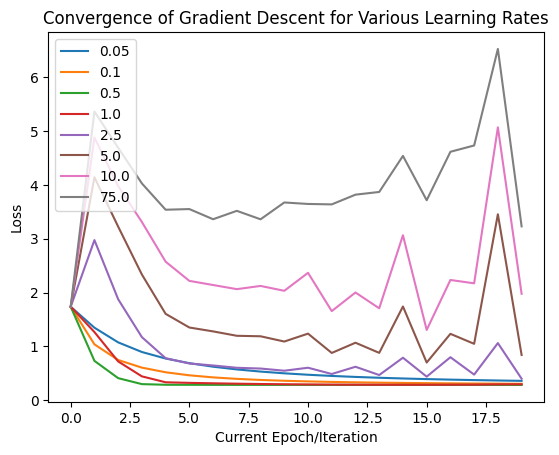

In [31]:
## Run gradient descent for all learning rates, and plot results
fig, ax = plt.subplots()
x_vals = range(num_epochs)
leg = []  # legend entries
w_finals = {}
for lr in lrs:
    ## Start from a random initialisation
    np.random.seed(12345)
    w_init = np.random.randn(X_train.shape[1],1)

    # Obtain the final weights via gradient descent
    w_final, losses, _ = gradient_descent(w_init, num_epochs, lr, X_train, y_train, logging=False)
    ax.plot(x_vals, losses, label=f'{lr}')
    leg.append(f'lr = {lr}')
    w_finals[f'lr={lr}'] = w_final

# Add legend, title and label the axes
ax.set_title("Convergence of Gradient Descent for Various Learning Rates")
ax.set_ylabel("Loss")
ax.set_xlabel("Current Epoch/Iteration")
ax.legend(loc=2)

In [32]:
## Evaluating the stored parameter sets to retrieve train and test accuracies
def evaluate(X,y,w):
    # Obtain predicted class probabilities
    y_hat = predict(X,w)

    # Obtain actual class labels (everything >=0.5 is class1, rest class0)
    c_hat = np.where(y_hat >= 0.5, 1, 0)

    # Evaluate the classification accuracy
    acc = np.sum(np.equal(c_hat, y))/y.shape[0]

    return acc

print(' >>> Training accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_train, y_train, v),3)}')

print('\n >>> Test accuracies for different learning rates: <<<')
for k,v in w_finals.items():
    print(f'{k}: \t {round(evaluate(X_test, y_test, v), 3)}')

 >>> Training accuracies for different learning rates: <<<
lr=0.05: 	 0.845
lr=0.1: 	 0.863
lr=0.5: 	 0.868
lr=1.0: 	 0.855
lr=2.5: 	 0.838
lr=5.0: 	 0.822
lr=10.0: 	 0.833
lr=75.0: 	 0.827

 >>> Test accuracies for different learning rates: <<<
lr=0.05: 	 0.822
lr=0.1: 	 0.84
lr=0.5: 	 0.852
lr=1.0: 	 0.83
lr=2.5: 	 0.815
lr=5.0: 	 0.798
lr=10.0: 	 0.812
lr=75.0: 	 0.8


## 3.3 Describe & Explain

Answer the following questions and elaborate on your observations:

In [33]:
## Answer the following questions:

# What do you observe? Are there general trends in convergence visible, and are they ‘good’ or ‘bad’?
    # For smaller learning rates (up to 1.0), the convergence of the loss towards 0 is smooth, with the smaller learning rates requiring slighly more
    # iterations for the loss to approach 0. For learning rates >= 1.0 this trend is reversed, with these learning rates requiring more iterations
    # for the cross-entropy loss to approach 0. For learning rates >= 2.5, the convergence towards 0 is no longer smooth, with observable oscillatory
    # characteristics from the plots of these hyperparamters. Large learning rates can lead to divergence due to the size of the update at each iteration of
    # the GD algorithm (can lead to the algorithm overshooting the minimum), which is a probable reason why we observe these characteristics in the above plot.

# What do you think would be the best choice out of the set of provided learning rates, and why?
    # From the observed characteristics of the above plots, a learning rate of 0.5 seems to be the best choice of hyperparamter. The cross-entropy loss
    # corresponding to this learning rate converges to 0 which is desirable as this will improve the accuracy of the predictions we make using our derived
    # weights. Furthermore the corresponding cross-entropy loss converges faster towards 0 (i.e in less iterations of GD) compared to the other learning rates
    # whose losses also converge toward 0. Fewer number of epochs will lead to faster training and lower computational cost. A learning rate of 0.5 can achieve
    # this without comprimising the accuracy of the model signficantly.

# Can you find an even better one?
    # This would depend on a few factors, with one being the random initialisation of the weights. While a learning rate of 0.5 works wonders for this scenario
    # (I have also attempted training the model with slightly higher and slightly lower learning rates, with minimal difference in performance), other random
    # intialisations can lead to different learning rates being more favourable. For example, using a random seed = np.random.seed(123456789) a learning rate of
    # 1.0 is by far and away the best hyperparameter choice.

# How is the accuracy on the training and test data related to these convergence results?
    # The cross-entropy loss essentially calculates how accurate our predicted output labels are for a given training input dataset when compared to the given
    # training ouptut labels. Smaller cross-entropy loss indicates that our the current weights/parameters of the model produce more predictions that are confident
    # and correct (smaller losses correspond to more optimal parameters). As a result we expect higher training and test accuracy when we are making predictions
    # using parameters that correspond to smaller loss.

    # This is no different in this example. In the above plots (and previously mentioned) it can be observed that a learning rate of 0.5 not only converges towards
    # 0 smoothly, but converges the quickest compared to the other hyperparameter choices. This convergence is reflected in the highest test and train accuracies
    # we observe. For larger learning rates we observed their convergence to be 'bad' with large loss and oscillatory behaviour being observed in the above plot
    # as the number of iterations of the GD algorithm increase. This poor convergence towards 0 loss corresponded to lower test and train accuracies for the
    # respective learning rates.